In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
communities = open("communities.data")
communities_names = open("communities.names")

with open('communities.data', 'r') as communities:
    communities = communities.read()
   # print(communities)

    
with open('communities.names', 'r') as communities_names:
    communities_names = communities_names.read()


#print((communities_names[3575])) #first line of attribute of a line 
text = communities_names[3575:3575+4275-97]
print(communities_names)

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

In [3]:
list_of_words = []
for i in range (0, len(text)-10):
    if text[i]== ' ':
        i+=1
        word = ''
        while text[i] != ' ':
            word+=text[i]
            i+=1
        list_of_words.append(word)
list_of_words2 = [ elem for elem in list_of_words if elem != 'numeric\n@attribute']
columns = [ elem for elem in list_of_words2 if elem != 'string\n@attribute']


In [4]:
list_of_words = []
word = ''
for k in range (0, len(communities)):
    if communities[k] == ',':
        list_of_words.append(word)
        word = ''
    #else if '\n' in communities[k]:
       # while communities[k]!= "'\'":
            
    else:
        word+=communities[k]

table_communities = []
lines = []
for l in range (0, len(list_of_words)):
    if l%128 == 0:
        table_communities.append(lines)
        lines = []
    else:
        lines.append(list_of_words[l])
for m in range (0, len(list_of_words), 127):
    list_of_words[m] = list_of_words[m].replace("\n"," ")

list_of_words2 = []
for n in range(0, len(list_of_words)):
    if (n%127 == 0) & (n != 0):
        word1, word2 = list_of_words[n].split(' ', 1)
        list_of_words2.append(word1)
        list_of_words2.append(word2)
    else:
        list_of_words2.append(list_of_words[n])


data = []
table = []
for o in range (0, len(list_of_words2)):
    if ((o+1)%128 == 0) & (o != 0):
        table.append(list_of_words2[o])
        data.append(table)
        table = []
    else:
        table.append(list_of_words2[o])

        
df = pd.DataFrame(data, columns = columns) 

In [27]:
df_clean = df.copy()

In [28]:
n = 0
f = []
dropColumns = []

for i in range (0, 128):
    for j in range (0, len(df)):
        if df_clean.iloc[:,i][j] == '?' :
            n += 1
    f.append(n)
    n = 0

for i in range (0, len(f)):
    if f[i] != 0:
        dropColumns.append(df_clean.columns.values[i])
        
for i in range (0, len(dropColumns)):
    df_clean.drop(dropColumns[i], axis = 1, inplace=True)
    
    

    
df_clean

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,0.17,0.34,...,0.12,0.42,0.5,0.51,0.64,0.12,0.26,0.2,0.32,0.2
1,53,Tukwilacity,1,0,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.5,0.34,0.6,0.52,0.02,0.12,0.45,0,0.67
2,24,Aberdeentown,1,0,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0,0.43
3,34,Willingborotownship,1,0.04,0.77,1,0.08,0.12,0.1,0.51,...,0.19,0.3,0.73,0.64,0.65,0.02,0.39,0.28,0,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0,0.03
5,6,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1,0.25,0.31,...,0.7,0.42,0.49,0.73,0.64,0.01,0.58,0.1,0,0.14
6,44,Lincolntown,1,0.01,0.39,0,0.98,0.06,0.02,0.3,...,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0,0.03
7,6,Selmacity,1,0.01,0.74,0.03,0.46,0.2,1,0.52,...,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0,0,0.55
8,21,Hendersoncity,1,0.03,0.34,0.2,0.84,0.02,0,0.38,...,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0,0.53
9,29,Claytoncity,1,0.01,0.4,0.06,0.87,0.3,0.03,0.9,...,0.22,0.42,0.34,0.23,0.09,0,0.47,0.11,0,0.15


In [31]:
df_numeric = df_clean.copy()

In [39]:
for i in range (0, len(df_numeric)):
    for j in range (2, 103):
        df_numeric.iloc[i][j]= float(df_numeric.iloc[i][j])
    
df_numeric

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,0.17,0.34,...,0.12,0.42,0.5,0.51,0.64,0.12,0.26,0.2,0.32,0.2
1,53,Tukwilacity,1,0,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.5,0.34,0.6,0.52,0.02,0.12,0.45,0,0.67
2,24,Aberdeentown,1,0,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0,0.43
3,34,Willingborotownship,1,0.04,0.77,1,0.08,0.12,0.1,0.51,...,0.19,0.3,0.73,0.64,0.65,0.02,0.39,0.28,0,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0,0.03
5,6,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1,0.25,0.31,...,0.7,0.42,0.49,0.73,0.64,0.01,0.58,0.1,0,0.14
6,44,Lincolntown,1,0.01,0.39,0,0.98,0.06,0.02,0.3,...,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0,0.03
7,6,Selmacity,1,0.01,0.74,0.03,0.46,0.2,1,0.52,...,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0,0,0.55
8,21,Hendersoncity,1,0.03,0.34,0.2,0.84,0.02,0,0.38,...,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0,0.53
9,29,Claytoncity,1,0.01,0.4,0.06,0.87,0.3,0.03,0.9,...,0.22,0.42,0.34,0.23,0.09,0,0.47,0.11,0,0.15


In [38]:
df_clean.iloc[1][1]

'Tukwilacity'

In [71]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns; sns.set()
from math import exp
from scipy import stats
import scipy
from scipy import *
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
scaler = StandardScaler()



df_circle = pd.DataFrame()


df_circle['ViolentCrimesPerPop']= df_clean['ViolentCrimesPerPop']
df_circle.ViolentCrimesPerPop = df_circle.ViolentCrimesPerPop.astype(float)

df_circle['racepctblack']= df_clean['racepctblack']
df_circle.racepctblack = df_circle.racepctblack.astype(float)


df_circle['racePctWhite']= df_clean['racePctWhite']
df_circle.racePctWhite = df_circle.racePctWhite.astype(float)

df_circle['racePctAsian']= df_clean['racePctAsian']
df_circle.racePctAsian = df_circle.racePctAsian.astype(float)

df_circle['racePctHisp']= df_clean['racePctHisp']
df_circle.racePctHisp = df_circle.racePctHisp.astype(float)







circleC = scaler.fit_transform(df_circle)


pca.fit_transform(circleC)




array([[-0.75839717,  0.22182187],
       [ 1.00185133,  0.63609122],
       [ 1.42925397, -0.80163169],
       ...,
       [ 2.85434143,  2.11245378],
       [ 0.3360667 , -0.1889776 ],
       [-0.64710137,  0.30146143]])

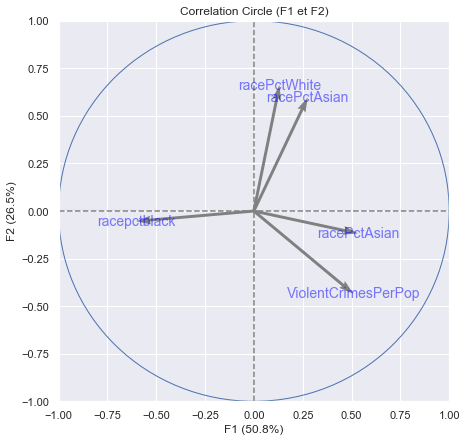

In [73]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram



def display_circles(pca, axis_ranks, labels=None, lims=None):
    
    '''
    Allow to plot correlation circle
    inspired by and Openclassroom code available on : 
    https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp
    
    pca, after dataset preprocessing
    axis_rank, components' indexes to study (int*int) list 
    labels, columns of studying dataset
    lims, limits the plot to indicated values, default None and (-1,1,-1,1) if nb_sample < 30
    '''
    pca.fit_transform(circleC)
    pcs = pca.components_ # principal components
    n_comp = len(pcs) # nb of principal components
    
    
    for d1, d2 in axis_ranks: #We plot the 3 first factorial plans or first 6 principal components
        if d2 < n_comp:

            # initiate the figure
            fig, ax = plt.subplots(figsize=(7,7))

            # déterminate graph limits
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # arrows plotting
            # if there is more than 30 arrows, we dont plot the extremities
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (cf doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # var names plot  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i-1], fontsize='14', ha='center', va='center', color="blue", alpha=0.5)
            
            # circle plot 
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # restricting the graph to its limits
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # plot vertical and horizontal lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # names of axes, with explained variance ratio
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

display_circles(pca, [(0,1)], labels = np.array(df_circle.columns[:-1]))



In [42]:
#group Violent crime and nonViolent crime by state
df_numeric_state = df_numeric.groupby('state').agg({'ViolentCrimesPerPop':'mean','nonViolPerPop':'mean'})[['ViolentCrimesPerPop','nonViolPerPop']].reset_index()

##Aggregate view of Non-Violent Crimes by State
data1 = dict(type='choropleth',
        colorscale = 'Viridis',
        autocolorscale = False,
        locations = df_clean_state['state'],
        locationmode = 'USA-states',
        z = df_clean_state['nonViolPerPop'].astype(float),
        colorbar = {'title':'non-Violent Crimes(Per-100K-Pop)'}
        )
layout1 = dict(
        title = 'Aggregate view of non-Violent Crimes Per 100K Population',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(85,173,240)'),
             )
    
fig1 = go.Figure(data = [data1],layout = layout1)
iplot(fig1,validate=False)

##Aggregate view of Violent Crimes by State
data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "Earth",
        locations = df_clean_state['state'],
        locationmode = 'USA-states',
        z = df_clean_state['ViolentCrimesPerPop'].astype('float'),
        colorbar = {'title':'Violent Crimes(Per-100K-Pop)'}
        )
layout2 = dict(
        title = 'Aggregate view of Violent Crimes Per 100K Population across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
             )
    
fig2 = go.Figure(data = [data2],layout = layout2)
iplot(fig2,validate=False)

DataError: No numeric types to aggregate

In [44]:
print(type(df_numeric.iloc[14][14]))

<class 'float'>
